In [12]:
import os
path, dirs, files = next(os.walk("D:/Git Hub Projects/Cats-Dogs-Dataset/train"))
file_count = len(files)
print(file_count)

25000


In [13]:
file_names = os.listdir("D:/Git Hub Projects/Cats-Dogs-Dataset/train")
print(file_names[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2

In [15]:
# Display dog image
img = mpimg.imread('D:/Git Hub Projects/Cats-Dogs-Dataset/train/dog.1000.jpg')
img

array([[[  9,   8,   4],
        [ 10,  11,   6],
        [ 13,  13,  11],
        ...,
        [160, 162, 183],
        [159, 161, 184],
        [158, 160, 183]],

       [[ 17,  13,  10],
        [ 16,  15,  11],
        [ 17,  17,  15],
        ...,
        [157, 159, 180],
        [156, 158, 181],
        [155, 157, 180]],

       [[ 17,  12,   8],
        [ 17,  13,  10],
        [ 17,  16,  14],
        ...,
        [155, 157, 178],
        [154, 156, 179],
        [153, 155, 178]],

       ...,

       [[110,  95,  88],
        [111,  96,  89],
        [112,  97,  90],
        ...,
        [128, 111, 101],
        [128, 112,  99],
        [128, 112,  99]],

       [[110,  95,  88],
        [109,  94,  87],
        [110,  95,  88],
        ...,
        [129, 112, 102],
        [129, 113, 100],
        [129, 113, 100]],

       [[113,  98,  91],
        [110,  95,  88],
        [109,  94,  87],
        ...,
        [125, 108,  98],
        [125, 109,  96],
        [125, 109,  96]]

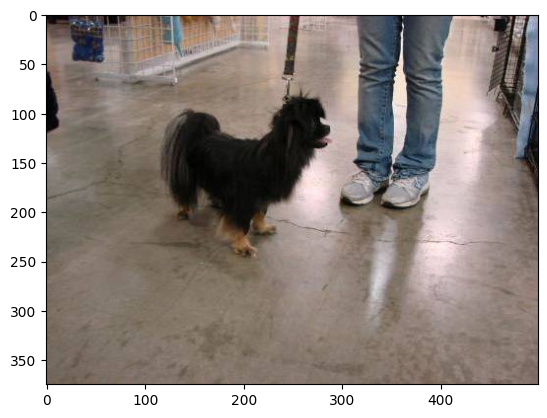

In [16]:
imgplt = plt.imshow(img)
plt.show()

In [17]:
file_names = os.listdir('D:/Git Hub Projects/Cats-Dogs-Dataset/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:-3])

cat.0.
cat.1.
cat.10.
cat.100.
cat.1000.


In [20]:
# Count the number of cats & dogs images seperately

file_names = os.listdir("D:/Git Hub Projects/Cats-Dogs-Dataset/train")
cat_count = 0
dog_count = 0

for img in file_names:
    name = img[0:3]
    if name == 'cat':
        cat_count += 1
    if name == 'dog':
        dog_count += 1

print('Number of cats: ', cat_count)
print('Number of dogs: ', dog_count)

Number of cats:  12500
Number of dogs:  12500


In [21]:
# Resizing all the images

# creating new directory for resized images
os.mkdir('D:/Git Hub Projects/Cats-Dogs-Dataset/resized_train/')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Git Hub Projects/Cats-Dogs-Dataset/resized_train/'

In [22]:
original_folder = 'D:/Git Hub Projects/Cats-Dogs-Dataset/train/'
resized_folder = 'D:/Git Hub Projects/Cats-Dogs-Dataset/resized_train/'

for i in range(25000):
    filename = os.listdir(original_folder)[i]
    img_path = os.path.join(original_folder, filename)

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    new_image_path = resized_folder + filename
    img.save(new_image_path)

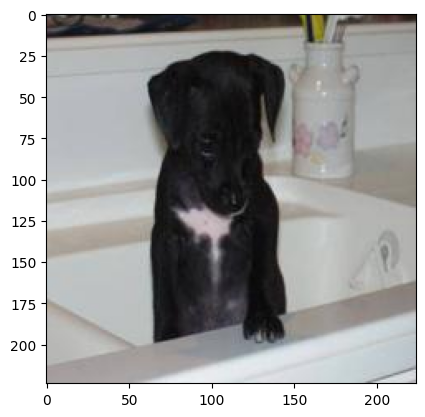

In [23]:
# display resized dog image
img = mpimg.imread('D:/Git Hub Projects/Cats-Dogs-Dataset/resized_train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

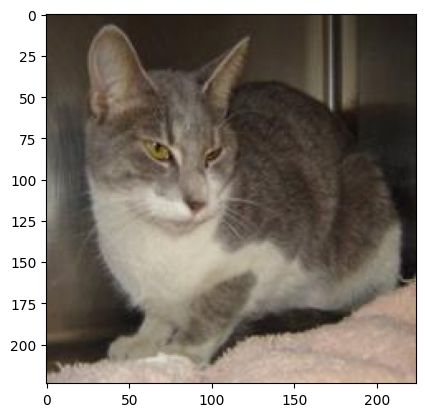

In [24]:
# display resized cat image
img = mpimg.imread('D:/Git Hub Projects/Cats-Dogs-Dataset/resized_train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [25]:
# creaing a for loop to assign labels
filenames = os.listdir(resized_folder)

labels = []

for i in range(25000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [26]:
print(filenames[13950:14005])
print(len(filenames))

['dog.11301.jpg', 'dog.11302.jpg', 'dog.11303.jpg', 'dog.11304.jpg', 'dog.11305.jpg', 'dog.11306.jpg', 'dog.11307.jpg', 'dog.11308.jpg', 'dog.11309.jpg', 'dog.1131.jpg', 'dog.11310.jpg', 'dog.11311.jpg', 'dog.11312.jpg', 'dog.11313.jpg', 'dog.11314.jpg', 'dog.11315.jpg', 'dog.11316.jpg', 'dog.11317.jpg', 'dog.11318.jpg', 'dog.11319.jpg', 'dog.1132.jpg', 'dog.11320.jpg', 'dog.11321.jpg', 'dog.11322.jpg', 'dog.11323.jpg', 'dog.11324.jpg', 'dog.11325.jpg', 'dog.11326.jpg', 'dog.11327.jpg', 'dog.11328.jpg', 'dog.11329.jpg', 'dog.1133.jpg', 'dog.11330.jpg', 'dog.11331.jpg', 'dog.11332.jpg', 'dog.11333.jpg', 'dog.11334.jpg', 'dog.11335.jpg', 'dog.11336.jpg', 'dog.11337.jpg', 'dog.11338.jpg', 'dog.11339.jpg', 'dog.1134.jpg', 'dog.11340.jpg', 'dog.11341.jpg', 'dog.11342.jpg', 'dog.11343.jpg', 'dog.11344.jpg', 'dog.11345.jpg', 'dog.11346.jpg', 'dog.11347.jpg', 'dog.11348.jpg', 'dog.11349.jpg', 'dog.1135.jpg', 'dog.11350.jpg']
25000


In [27]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
25000


In [28]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[12500 12500]


In [29]:
# Converting all the resized images to numpy arrays

import cv2
import glob

In [30]:
image_directory = resized_folder
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [122 200 246]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [123 201 247]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 204 245]
   [123 202 245]
   [123 202 245]]

  ...

  [[ 55 123 160]
   [ 55 123 160]
   [ 56 124 161]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 53 121 158]
   [ 54 122 159]
   [ 55 123 160]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 52 120 157]
   [ 52 120 157]
   [ 53 121 158]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [185 205 210]
   [173 197 203]
   [164 192 199]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [180 200 205]
   [169 195 201]
   [167 195 202]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [172 192 197]
   [167 193 200]
   [171 198

In [31]:
type(dog_cat_images)

numpy.ndarray

In [32]:
print(dog_cat_images.shape)

(25000, 224, 224, 3)


In [33]:
X = dog_cat_images
Y = np.asarray(labels)

In [34]:
# Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(25000, 224, 224, 3) (20000, 224, 224, 3) (5000, 224, 224, 3)


In [36]:
# scaling the data
X_train_scaled = X_train/255.0

X_test_scaled = X_test/255.0

# batch_size = 100  # You can adjust this based on your available memory

# num_batches = len(X_train) // batch_size

# X_train_scaled_batches = []

# for i in range(num_batches):
#     batch_start = i * batch_size
#     batch_end = (i + 1) * batch_size
#     batch_scaled = X_train[batch_start:batch_end] / 255.0
#     X_train_scaled_batches.append(batch_scaled)

# # Process the last batch (which might have a different size)
# if num_batches * batch_size < len(X_train):
#     batch_scaled = X_train[num_batches * batch_size:] / 255.0
#     X_train_scaled_batches.append(batch_scaled)

# # Now X_train_scaled_batches contains the scaled batches of data


MemoryError: Unable to allocate 115. MiB for an array with shape (100, 224, 224, 3) and data type float64

In [ ]:
print(X_train_scaled)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(X_train_scaled, Y_train, epochs=5)

In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')